In [1]:
import warnings
warnings.filterwarnings('ignore')

### Run in collab
<a href="https://colab.research.google.com/github/racousin/rl_introduction/blob/master/notebooks/6_RL_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get install build-essential python-dev swig python-pygame > /dev/null 2>&1
!pip install box2d-py==2.3.8  > /dev/null 2>&1
!pip install 'gymnasium[box2d,atari,accept-rom-license]'==0.29.1
!pip install stable_baselines3 > /dev/null 2>&1

  Obtaining dependency information for shimmy[atari]<1.0,>=0.1.0 from https://files.pythonhosted.org/packages/6f/d3/3d3787570f0cb16ba37a4fbd604498d8ee04ce987b7c8564a13d2c1858cf/Shimmy-0.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for autorom[accept-rom-license]~=0.4.2 from https://files.pythonhosted.org/packages/83/aa/e2695fa0c93b39cfe2065fcd189e7eb2db88f6e0922e932fc615827070da/AutoROM-0.4.2-py3-none-any.whl.metadata
  Using cached box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: box2d-py
    Found existing installation: box2d-py 2.3.8
    Uninstalling box2d-py-2.3.8:
      Successfully uninstalled box2d-py-2.3.8
  Attempting uninstall: shimmy
    Found existing installation: Shimmy 1.3.0
    Uninstalling Shimmy-1.3.0:
      Successfully uninstalled Shimmy-1.3.0
  Attempting uninstall: autorom
    Found existing installation: AutoROM 0.6.1
    Uninstalling AutoROM-0.6.1:
      Successfully uninstalled AutoROM-0.6.1

[notice] A new release of pip 

In [43]:
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import os

# baselines framework
see code:
- https://github.com/DLR-RM/stable-baselines3

And doc:
- https://stable-baselines3.readthedocs.io/en/master/index.html

Pre-trained agent:
- https://github.com/DLR-RM/rl-baselines3-zoo

### Train, Save, Load (Example DQN): 

In [2]:
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy


# Create environment

env = gym.make('CartPole-v1') # if cartPole is too easy go for env = gym.make('LunarLander-v2')

# Instantiate the agent
model = DQN('MlpPolicy', env, learning_rate=1e-3)#, prioritized_replay=True, verbose=1)
# Train the agent
model.learn(total_timesteps=10000)
# Save the agent
model.save("dqn_save")
del model  # delete trained model to demonstrate loading


In [6]:
from stable_baselines3 import DQN, PPO
# Load the trained agent
model = PPO.load("dqn_save")

# Evaluate the agent
mean_reward, n_steps = evaluate_policy(model, env, n_eval_episodes=10)

TypeError: DQNPolicy.__init__() got an unexpected keyword argument 'use_sde'

In [4]:
mean_reward

9.4

### Hyper parameters:

In [32]:
from stable_baselines3 import DQN, A2C
import torch as th

#### The policy:

You can use available policies 'MlpPolicy' (fully connected), 'CnnPolicy' (convolutional) and configure them. For example:
- 3 layers of 32, 16, 8 neurons for dqn

In [29]:
policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=[32, 16, 8])
model = DQN('MlpPolicy', env, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=500)

In [30]:
mean_reward, n_steps = evaluate_policy(model, env, n_eval_episodes=10)
mean_reward

11.2

- 1 share layer of 64 neurons
- 2 specifics layers od 32, 16 neurons for policy model
- 3 specifics layers of 64, 16, 16 neurons for value function model

In [33]:
policy_kwargs = dict(activation_fn=th.nn.ReLU,
                     net_arch=dict(pi=[32, 32], vf=[32, 32]))
# Create the agent
model = A2C("MlpPolicy", "CartPole-v1", policy_kwargs=policy_kwargs, verbose=1)
model.learn(total_timesteps=500)

Using cpu device
Creating environment from the given name 'CartPole-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.5     |
|    ep_rew_mean        | 18.5     |
| time/                 |          |
|    fps                | 1131     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.69    |
|    explained_variance | -0.702   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 2.45     |
|    value_loss         | 12.9     |
------------------------------------


In [34]:
mean_reward, n_steps = evaluate_policy(model, env, n_eval_episodes=10)
mean_reward

9.3

#### Specific parameters of algorithms

For example for DQN:
- buffer_size – (int) size of the replay buffer
- batch_size – (int) size of a batched sampled from replay buffer for training
- double_q – (bool) Whether to enable Double-Q learning or not.
- prioritized_replay – (bool) if True prioritized replay buffer will be used.
- learning_rate – (float) learning rate



In [35]:
model = DQN('MlpPolicy', env,
            learning_rate=0.0005,
            buffer_size=50000,
            batch_size=32)
model.learn(total_timesteps=500)

For example for A2C:
- n_steps – (int) The number of steps to run for each environment per update (i.e. batch size is n_steps * n_env where n_env is number of environment copies running in parallel)
- max_grad_norm – (float) The maximum value for the gradient clipping
- learning_rate – (float) The learning rate

In [36]:
model = A2C('MlpPolicy', env,
            learning_rate=0.0007,
            n_steps=5,
            max_grad_norm=0.5)
model.learn(total_timesteps=500)
mean_reward, n_steps = evaluate_policy(model, env, n_eval_episodes=10)
mean_reward

31.2

### monitoring 

In [37]:
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import DDPG, DQN
import seaborn as sns
sns.set_style("darkgrid")

In [38]:

#from stable_baselines3.deepq.policies import MlpPolicy
from stable_baselines3 import PPO, DQN
# Create log dir
log_dir = "tmp/test"
os.makedirs(log_dir, exist_ok=True)

env = gym.make('CartPole-v1')
env = Monitor(env, log_dir, allow_early_resets=True)

model = DQN('MlpPolicy', env, verbose=0)
time_steps = 5000
model.learn(total_timesteps=time_steps)

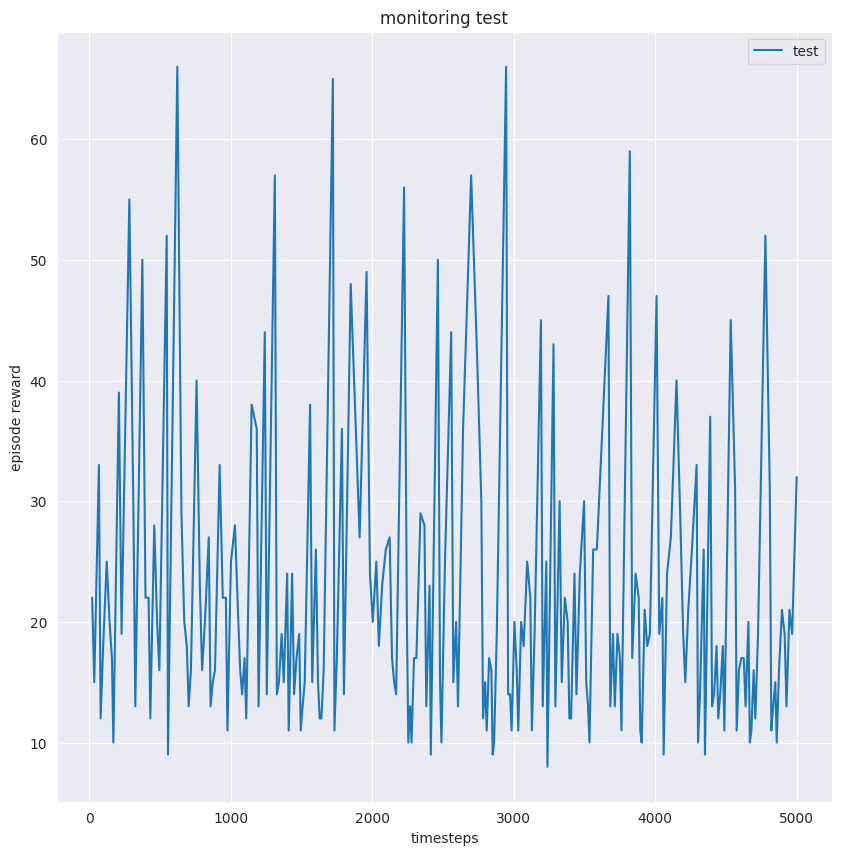

In [39]:
fig,ax = plt.subplots(figsize=(10,10))
res = pd.read_csv(log_dir+'/monitor.csv', skiprows=1)
ax.plot(res['l'].cumsum(), res['r'], label = 'test')
ax.set_xlabel('timesteps')
ax.set_ylabel('episode reward')
ax.set_title('monitoring test')
ax.legend()

# TODO 1) Benchmark agents
Start with CartPole-v1

Try 1. differents algorithms (DQN, A2C https://stable-baselines3.readthedocs.io/en/master/guide/algos.html)

Try 2. differents hyperparameters


### Benchmark

In [40]:
env_names = ['CartPole-v1'] # try with more environments 'MountainCar-v0','CartPole-v1','LunarLander-v2']
algs = [A2C,DQN]
alg_names = ['a2c','dqn']
layers = [[32],[64,32],[64,32,16]]

In [41]:
time_steps = 10000

In [42]:
for env_name in env_names:
    for i,alg in enumerate(algs):
        print(alg_names[i])
        for l,layer in enumerate(layers):
            
            log_dir= output_dir='tmp/'+alg_names[i]+'_'+env_name + '_' + str(len(layer))
            os.makedirs(log_dir, exist_ok=True) 
            
            env = gym.make(env_name)
            env = Monitor(env, log_dir, allow_early_resets=True)
            
            if alg_names[i] == 'dqn':
                policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=layer)
            else:
                policy_kwargs = dict(activation_fn=th.nn.ReLU, net_arch=layer)
            
            model = alg('MlpPolicy', env, verbose=0, policy_kwargs=policy_kwargs)

            model.learn(total_timesteps=time_steps)# , callback=callback)

a2c
dqn


a2c
dqn


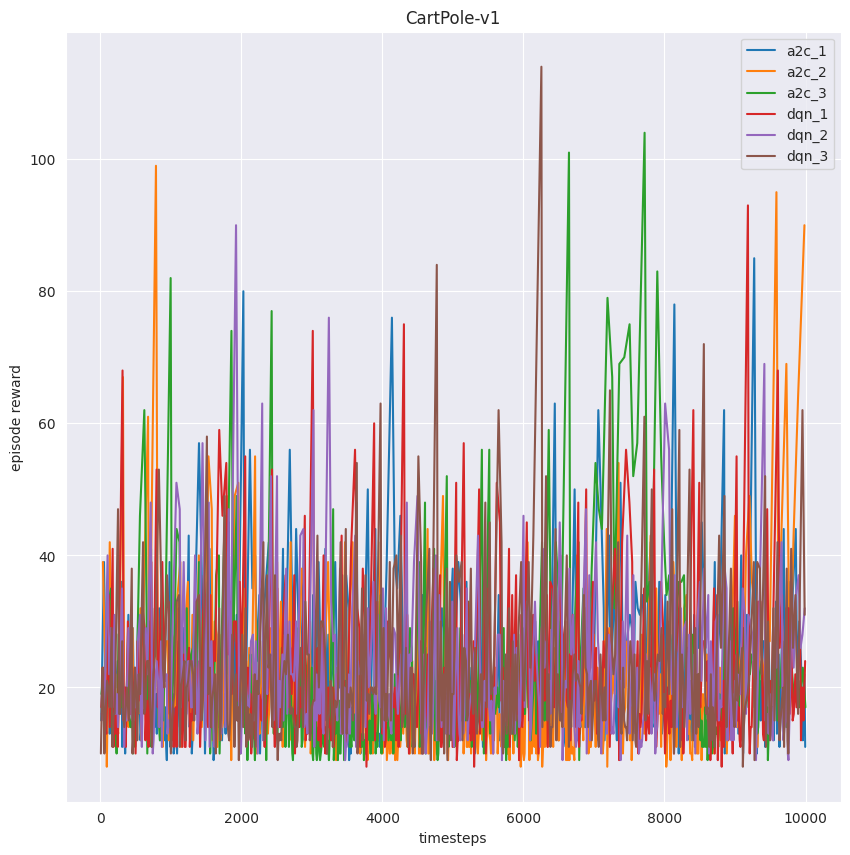

In [44]:
glob_res = {}
for env_name in env_names:
    fig,ax = plt.subplots(figsize=(10,10))
    glob_res['env_name'] = {}
    for i,alg in enumerate(algs):
        glob_res['env_name'][alg_names[i]] = {}
        print(alg_names[i])
        for l,layer in enumerate(layers):

            log_dir= output_dir='tmp/'+alg_names[i]+'_'+env_name + '_' + str(len(layer))
            res = pd.read_csv(log_dir+'/monitor.csv', skiprows=1)
            ax.plot(res['l'].cumsum(), res['r'], label = alg_names[i]+ '_' + str(len(layer)))
            
            glob_res['env_name'][alg_names[i]][str(len(layer))] = res
    ax.set_xlabel('timesteps')
    ax.set_ylabel('episode reward')
    ax.set_title(env_name)
    ax.legend()

# TODO 2) Join a Competition in RLArena.com
1. create acount on rlarena.com
2. train your model on env = gym.make('LunarLander-v2')
3. save your model with "{model_type}_model.zip" example "DQN_model.zip"
4. export it with the function bellow
5. activate it in https://rlarena.com/my-subscriptions

In [17]:
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.evaluation import evaluate_policy


# Create environment

env = gym.make('LunarLander-v2') # if cartPole is too easy go for env = gym.make('LunarLander-v2')

# Instantiate the agent
model = PPO('MlpPolicy', env, learning_rate=1e-3)#, prioritized_replay=True, verbose=1)
# Train the agent
model.learn(total_timesteps=10000)
# Save the agent
model.save("jojo")
del model  # delete trained model to demonstrate loading


In [19]:
import requests

def attach_agent(key_id, password, agent_attach_name, model_path):
    """
    Attach an agent to the RL Arena competition.

    Args:
    - username (str): Your username.
    - password (str): Your password.
    - agent_attach_name (str): The name to attach the agent with.
    - model_path (str): The file path to the agent's model.

    Returns:
    - dict: The JSON response from the server.
    """
    # Endpoint URL
    #url = 'https://rlarena.com/api/direct_attache_agents_notebook/competition/1'
    url = 'http://localhost:4999/api/direct_attache_agents_notebook/competition/1'

    # Your credentials and agent details
    data = {
        'key_id': key_id,
        'password': password,
        'agent_attach_name': agent_attach_name,
    }

    # Files to upload: agent.py and the model
    files = {
        'model': (model_path, open(model_path, 'rb')),  # Adjust if necessary
        'agent_code': ('agent.py', open('agent.py', 'r')),   # The agent code
    }

    # Make the POST request
    try:
        response = requests.post(url, data=data, files=files)
        # Ensure files are closed properly
        files['model'][1].close()
        files['agent_code'][1].close()
        return response.json()  # Return the JSON response
    except Exception as e:
        print(f"Failed to attach agent due to: {str(e)}")
        return None

# Example usage
model_path = "jojo.zip"
response = attach_agent("testuser", "testpassword", "My LunarLander Agent", model_path)
print(response)


{'attache_agent_id': 24, 'message': 'Uploaded successfully: jojo.zip, agent.py'}


### More complete benchmark for doing better!

DQN parameter
https://github.com/openai/baselines-results/blob/master/dqn_results.ipynb

atari baselines scores https://github.com/araffin/rl-baselines-zoo/blob/master/benchmark.md

atari spinningup scores https://spinningup.openai.com/en/latest/spinningup/bench.html

compute other metrics https://github.com/deepmind/bsuite

### Example of train with atari

In [ ]:
from stable_baselines3.common.cmd_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import A2C

# There already exists an environment generator
# that will make and wrap atari environments correctly.
# Here we are also multiprocessing training (num_env=4 => 4 processes)
env = make_atari_env('PongNoFrameskip-v4', n_envs=4, seed=0)
# Frame-stacking with 4 frames
env = VecFrameStack(env, n_stack=8)

model = A2C('CnnPolicy', env, verbose=1)
model.learn(total_timesteps=250000)